<a href="https://colab.research.google.com/github/YazhiniSiVakumar22/processing-image-data-for-deep-learning/blob/main/MNIST_Digital_classification_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST HANDWRITTEN DIGIT CLASSIFICATION USING DEEP LEARNING**

importing the dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import  cv2_imshow
from PIL import Image
import tensorflow as tlf
tlf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading  the MNIST data from keras datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [ ]:
#shape of the numpy array

print(X_train.shape ,Y_train.shape , X_test.shape ,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data =60000 Images

Test data= 10000 images

image dimesnion -- 28 * 28

grayscale image -- 1 channel

In [ ]:
# printing the 10 th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


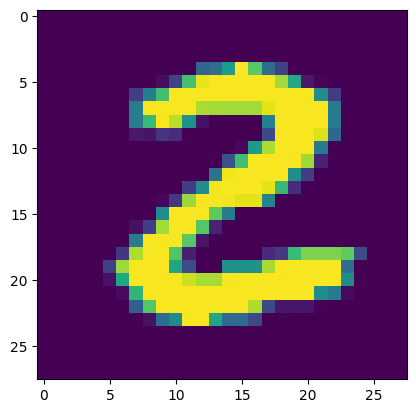

2


In [ ]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

#print the corresponding label
print(Y_train[25])

Image Lables

In [ ]:
print(Y_train.shape , Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in y_train

print(np.unique(Y_train))

# unique values in Y_test

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this labels as such or we can also apply one hot encoding

All the image have the same dimesion in this dataset, if not, we have to resize all the image to a common dimension

In [ ]:
#  scaling  the values

X_train= X_train/255

X_test= X_test/255


In [ ]:
# printing the 10 th image


print(X_train[10])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Buliding the Neural Network

In [ ]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:


# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2955 - accuracy: 0.9136
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1379 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1016 - accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0817 - accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0669 - accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0575 - accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0495 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0441 - accuracy: 0.9860
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0385 - accuracy: 0.9876
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.033

Training data accuracy =98.9%

Accuracy on Test data

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.9757
0.9757000207901001


Test data Accuracy =97.5%

In [ ]:
print(X_test . shape)

(10000, 28, 28)


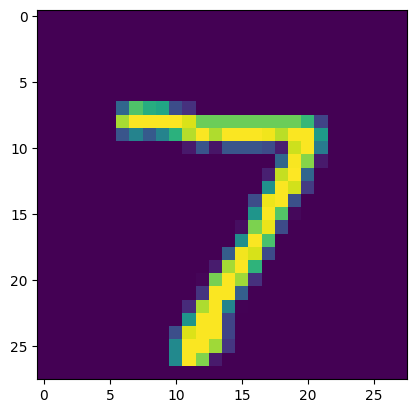

In [ ]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()




In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred= model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[8.1805522e-03 8.7670267e-02 7.2903025e-01 9.3313837e-01 4.8044870e-07
 3.0810973e-03 1.3253662e-11 9.9999416e-01 3.7852272e-02 6.3769180e-01]


Model.predict() gives the prediction probability of each class for that data point

In [ ]:
# converting the prediction probabilities to class label

label_for_first_image=np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [ ]:
# converting the prediction probabilities to class label  for all test data  points

Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(Y_pred)

[[8.1805522e-03 8.7670267e-02 7.2903025e-01 ... 9.9999416e-01
  3.7852272e-02 6.3769180e-01]
 [7.6685846e-03 6.1889771e-02 9.9987918e-01 ... 4.0124587e-07
  2.2829624e-01 3.8018111e-08]
 [1.4315643e-03 9.9935764e-01 2.7833028e-02 ... 5.0931022e-02
  5.6822646e-01 4.6904096e-03]
 ...
 [5.5880605e-08 3.0580137e-04 4.2205775e-05 ... 3.8798353e-01
  4.2544302e-02 9.9967629e-01]
 [3.7414602e-03 8.3447976e-06 5.7396125e-02 ... 3.7288517e-02
  7.0627905e-02 8.5105203e-06]
 [6.3098548e-03 3.6658987e-01 1.2638848e-02 ... 3.7918644e-06
  5.3877971e-04 2.7694371e-08]]


Y_test --> True labels

Y_pred -->  predicted labels

Confusion Matrix

In [ ]:
conf_max=confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(conf_max)

tf.Tensor(
[[ 970    0    1    1    1    1    2    1    3    0]
 [   1 1126    1    0    0    2    2    1    2    0]
 [   5    0 1013    2    3    1    1    2    5    0]
 [   0    0    7  980    0   11    0    2    6    4]
 [   1    0    4    1  957    2    1    3    0   13]
 [   2    0    0    7    1  872    4    1    2    3]
 [   6    2    1    1    5    6  933    0    4    0]
 [   1    3   20    2    0    0    0  993    2    7]
 [   3    1    6    5    6   10    1    2  935    5]
 [   2    3    1    3    7    4    0    8    4  977]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted_Labels')

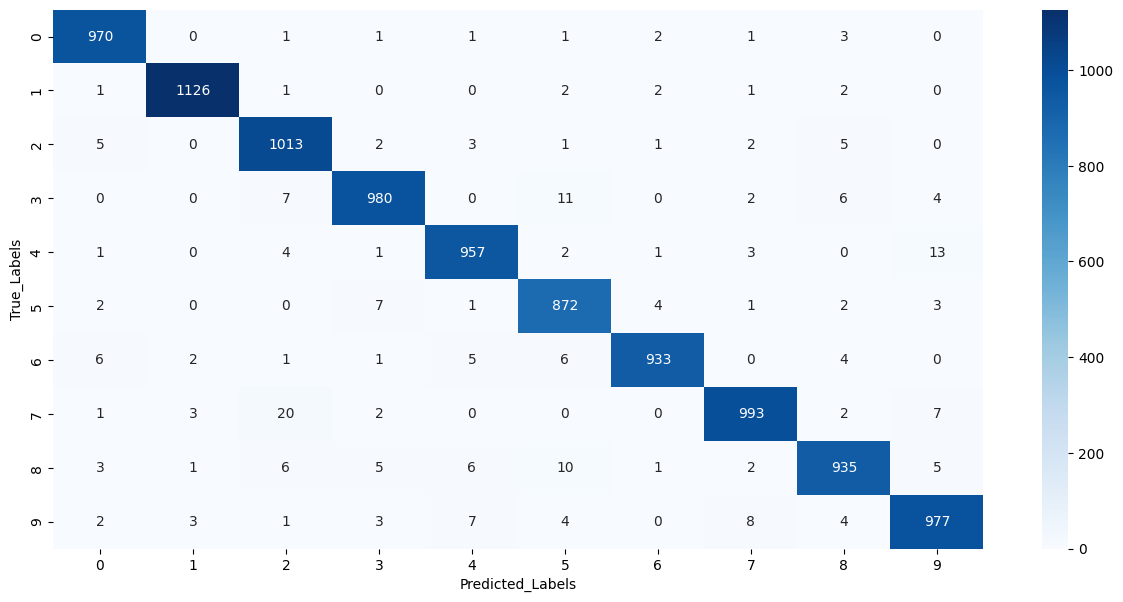

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_max , annot=True,fmt='d',cmap='Blues')
plt.ylabel('True_Labels')
plt.xlabel('Predicted_Labels')

**Buliding a predictive sysytem**

In [ ]:
input_image_path='/content/mnis_3_image.jpg'
input_image=cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[31 31 31]
  [31 31 31]
  [31 31 31]
  ...
  [29 29 29]
  [29 29 29]
  [29 29 29]]

 [[31 31 31]
  [31 31 31]
  [31 31 31]
  ...
  [29 29 29]
  [29 29 29]
  [29 29 29]]

 [[31 31 31]
  [31 31 31]
  [31 31 31]
  ...
  [29 29 29]
  [29 29 29]
  [29 29 29]]

 ...

 [[30 30 30]
  [30 30 30]
  [30 30 30]
  ...
  [29 29 29]
  [29 29 29]
  [29 29 29]]

 [[30 30 30]
  [30 30 30]
  [30 30 30]
  ...
  [29 29 29]
  [29 29 29]
  [29 29 29]]

 [[30 30 30]
  [30 30 30]
  [30 30 30]
  ...
  [29 29 29]
  [29 29 29]
  [29 29 29]]]


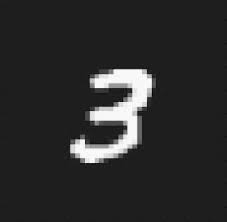

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(222, 227, 3)

In [ ]:
grayscale=cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(222, 227)

In [ ]:
# resize
input_image_resize=cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
print(input_image_resize)

[[ 30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30
   30  30  30  30  30  30  30  30  30  30]
 [ 30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30
   30  30  30  30  30  30  30  30  30  30]
 [ 30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30
   30  30  30  30  30  30  30  30  30  30]
 [ 30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30
   30  30  30  30  30  30  30  30  30  30]
 [ 30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30
   30  30  30  30  30  30  30  30  30  30]
 [ 30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30
   30  30  30  30  30  30  30  30  30  30]
 [ 30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30
   30  30  30  30  30  30  30  30  30  30]
 [ 30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30
   30  30  30  30  30  30  30  30  30  30]
 [ 30  30  30  30  30  30  30  30  30  30  30  30  30  24  27  2

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 43ms/step
[[1.98585418e-04 3.74143183e-01 9.98659253e-01 4.13690686e-01
  1.62854360e-03 3.88356447e-02 2.04521674e-03 5.11298299e-01
  6.15669668e-01 1.19855795e-04]]


In [ ]:
input_pred_label=np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

2


PREDICTIVE SYSTEM

Path of the image to be predicted: /content/mnis_3_image.jpg


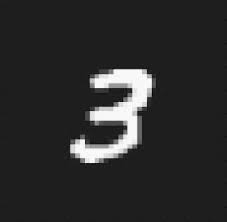

1/1 [==============================] - 0s 26ms/step
The Handwritten Digit is recognised as  2


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)